# Homework-2: MLP for MNIST Classification

### **Deadline: 2018.11.04 23:59:59**

### In this homework, you need to
- #### implement SGD optimizer (`./optimizer.py`)
- #### implement forward and backward for FCLayer (`layers/fc_layer.py`)
- #### implement forward and backward for SigmoidLayer (`layers/sigmoid_layer.py`)
- #### implement forward and backward for ReLULayer (`layers/relu_layer.py`)
- #### implement EuclideanLossLayer (`criterion/euclidean_loss.py`)
- #### implement SoftmaxCrossEntropyLossLayer (`criterion/softmax_cross_entropy.py`)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

from network import Network
from solver import train, test
from plot import plot_loss_and_acc

## Load MNIST Dataset
We use tensorflow tools to load dataset for convenience.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
def decode_image(image):
    # Normalize from [0, 255.] to [0., 1.0], and then subtract by the mean value
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [784])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # Encode label with one-hot encoding
    return tf.one_hot(label, depth=10)

In [4]:
# Data Preprocessing
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))

x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

## Set Hyerparameters
You can modify hyerparameters by yourself.

In [5]:
batch_size = 100
max_epoch = 20
init_std = 0.01

learning_rate_SGD = 0.001
weight_decay = 0.5

disp_freq = 50

## 1. MLP with Euclidean Loss
In part-1, you need to train a MLP with **Euclidean Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively.
### TODO
Before executing the following code, you should complete **./optimizer.py** and **criterion/euclidean_loss.py**.

In [6]:
from criterion import EuclideanLossLayer
from optimizer import SGD

criterion = EuclideanLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 1.1 MLP with Euclidean Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/fc_layer.py** and **layers/sigmoid_layer.py**.

In [7]:
from layers import FCLayer, SigmoidLayer

sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

In [8]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 0.5765	 Accuracy 0.0700
Epoch [0][20]	 Batch [50][550]	 Training Loss 0.5015	 Accuracy 0.1516
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.2749	 Accuracy 0.2320
Epoch [0][20]	 Batch [150][550]	 Training Loss 0.1959	 Accuracy 0.3131
Epoch [0][20]	 Batch [200][550]	 Training Loss 0.1552	 Accuracy 0.3809
Epoch [0][20]	 Batch [250][550]	 Training Loss 0.1303	 Accuracy 0.4394
Epoch [0][20]	 Batch [300][550]	 Training Loss 0.1134	 Accuracy 0.4853
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.1012	 Accuracy 0.5211
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.0919	 Accuracy 0.5510
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.0845	 Accuracy 0.5751
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.0786	 Accuracy 0.5957

Epoch [0]	 Average training loss 0.0737	 Average training accuracy 0.6139
Epoch [0]	 Average validation loss 0.0221	 Average validation accuracy 0.8346

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.0215	 Accuracy 0.8400


Epoch [8]	 Average training loss 0.0167	 Average training accuracy 0.8713
Epoch [8]	 Average validation loss 0.0150	 Average validation accuracy 0.9136

Epoch [9][20]	 Batch [0][550]	 Training Loss 0.0155	 Accuracy 0.9300
Epoch [9][20]	 Batch [50][550]	 Training Loss 0.0162	 Accuracy 0.8784
Epoch [9][20]	 Batch [100][550]	 Training Loss 0.0162	 Accuracy 0.8758
Epoch [9][20]	 Batch [150][550]	 Training Loss 0.0165	 Accuracy 0.8707
Epoch [9][20]	 Batch [200][550]	 Training Loss 0.0165	 Accuracy 0.8724
Epoch [9][20]	 Batch [250][550]	 Training Loss 0.0164	 Accuracy 0.8722
Epoch [9][20]	 Batch [300][550]	 Training Loss 0.0164	 Accuracy 0.8736
Epoch [9][20]	 Batch [350][550]	 Training Loss 0.0165	 Accuracy 0.8718
Epoch [9][20]	 Batch [400][550]	 Training Loss 0.0165	 Accuracy 0.8724
Epoch [9][20]	 Batch [450][550]	 Training Loss 0.0165	 Accuracy 0.8721
Epoch [9][20]	 Batch [500][550]	 Training Loss 0.0165	 Accuracy 0.8717

Epoch [9]	 Average training loss 0.0165	 Average training accuracy 

Epoch [17][20]	 Batch [400][550]	 Training Loss 0.0153	 Accuracy 0.8796
Epoch [17][20]	 Batch [450][550]	 Training Loss 0.0153	 Accuracy 0.8792
Epoch [17][20]	 Batch [500][550]	 Training Loss 0.0154	 Accuracy 0.8788

Epoch [17]	 Average training loss 0.0153	 Average training accuracy 0.8791
Epoch [17]	 Average validation loss 0.0133	 Average validation accuracy 0.9188

Epoch [18][20]	 Batch [0][550]	 Training Loss 0.0137	 Accuracy 0.9300
Epoch [18][20]	 Batch [50][550]	 Training Loss 0.0147	 Accuracy 0.8916
Epoch [18][20]	 Batch [100][550]	 Training Loss 0.0149	 Accuracy 0.8849
Epoch [18][20]	 Batch [150][550]	 Training Loss 0.0152	 Accuracy 0.8791
Epoch [18][20]	 Batch [200][550]	 Training Loss 0.0152	 Accuracy 0.8801
Epoch [18][20]	 Batch [250][550]	 Training Loss 0.0151	 Accuracy 0.8803
Epoch [18][20]	 Batch [300][550]	 Training Loss 0.0150	 Accuracy 0.8816
Epoch [18][20]	 Batch [350][550]	 Training Loss 0.0152	 Accuracy 0.8797
Epoch [18][20]	 Batch [400][550]	 Training Loss 0.0152	

In [9]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9005.



## 1.2 MLP with Euclidean Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Euclidean loss function.

### TODO
Before executing the following code, you should complete **layers/relu_layer.py**.

In [8]:
from layers import ReLULayer

reluMLP = Network()
# TODO build ReLUMLP with FCLayer and ReLULayer
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [9]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 0.2810	 Accuracy 0.1600
Epoch [0][20]	 Batch [50][550]	 Training Loss 0.0776	 Accuracy 0.4531
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.0530	 Accuracy 0.5871
Epoch [0][20]	 Batch [150][550]	 Training Loss 0.0432	 Accuracy 0.6501
Epoch [0][20]	 Batch [200][550]	 Training Loss 0.0375	 Accuracy 0.6934
Epoch [0][20]	 Batch [250][550]	 Training Loss 0.0336	 Accuracy 0.7254
Epoch [0][20]	 Batch [300][550]	 Training Loss 0.0308	 Accuracy 0.7480
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.0287	 Accuracy 0.7652
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.0270	 Accuracy 0.7794
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.0256	 Accuracy 0.7914
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.0245	 Accuracy 0.8006

Epoch [0]	 Average training loss 0.0235	 Average training accuracy 0.8087
Epoch [0]	 Average validation loss 0.0114	 Average validation accuracy 0.9238

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.0121	 Accuracy 0.9300


Epoch [8]	 Average training loss 0.0079	 Average training accuracy 0.9416
Epoch [8]	 Average validation loss 0.0068	 Average validation accuracy 0.9616

Epoch [9][20]	 Batch [0][550]	 Training Loss 0.0069	 Accuracy 0.9600
Epoch [9][20]	 Batch [50][550]	 Training Loss 0.0073	 Accuracy 0.9494
Epoch [9][20]	 Batch [100][550]	 Training Loss 0.0075	 Accuracy 0.9451
Epoch [9][20]	 Batch [150][550]	 Training Loss 0.0077	 Accuracy 0.9434
Epoch [9][20]	 Batch [200][550]	 Training Loss 0.0076	 Accuracy 0.9442
Epoch [9][20]	 Batch [250][550]	 Training Loss 0.0076	 Accuracy 0.9439
Epoch [9][20]	 Batch [300][550]	 Training Loss 0.0077	 Accuracy 0.9439
Epoch [9][20]	 Batch [350][550]	 Training Loss 0.0077	 Accuracy 0.9436
Epoch [9][20]	 Batch [400][550]	 Training Loss 0.0077	 Accuracy 0.9438
Epoch [9][20]	 Batch [450][550]	 Training Loss 0.0077	 Accuracy 0.9440
Epoch [9][20]	 Batch [500][550]	 Training Loss 0.0078	 Accuracy 0.9430

Epoch [9]	 Average training loss 0.0078	 Average training accuracy 

Epoch [17][20]	 Batch [350][550]	 Training Loss 0.0072	 Accuracy 0.9500
Epoch [17][20]	 Batch [400][550]	 Training Loss 0.0072	 Accuracy 0.9502
Epoch [17][20]	 Batch [450][550]	 Training Loss 0.0072	 Accuracy 0.9504
Epoch [17][20]	 Batch [500][550]	 Training Loss 0.0073	 Accuracy 0.9496

Epoch [17]	 Average training loss 0.0073	 Average training accuracy 0.9496
Epoch [17]	 Average validation loss 0.0063	 Average validation accuracy 0.9658

Epoch [18][20]	 Batch [0][550]	 Training Loss 0.0065	 Accuracy 0.9600
Epoch [18][20]	 Batch [50][550]	 Training Loss 0.0068	 Accuracy 0.9569
Epoch [18][20]	 Batch [100][550]	 Training Loss 0.0070	 Accuracy 0.9516
Epoch [18][20]	 Batch [150][550]	 Training Loss 0.0071	 Accuracy 0.9504
Epoch [18][20]	 Batch [200][550]	 Training Loss 0.0071	 Accuracy 0.9517
Epoch [18][20]	 Batch [250][550]	 Training Loss 0.0071	 Accuracy 0.9512
Epoch [18][20]	 Batch [300][550]	 Training Loss 0.0071	 Accuracy 0.9508
Epoch [18][20]	 Batch [350][550]	 Training Loss 0.0072	

In [10]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9533.



## Plot

In [ ]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 2. MLP with Softmax Cross-Entropy Loss
In part-2, you need to train a MLP with **Softmax Cross-Entropy Loss**.  
**Sigmoid Activation Function** and **ReLU Activation Function** will be used respectively again.
### TODO
Before executing the following code, you should complete **criterion/softmax_cross_entropy_loss.py**.

In [11]:
from criterion import SoftmaxCrossEntropyLossLayer

criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 2.1 MLP with Softmax Cross-Entropy Loss and Sigmoid Activation Function
Build and train a MLP contraining one hidden layer with 128 units using Sigmoid activation function and Softmax cross-entropy loss function.

In [12]:
sigmoidMLP = Network()
# Build MLP with FCLayer and SigmoidLayer
# 128 is the number of hidden units, you can change by your own
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

### Train

In [ ]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

### Test

In [ ]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

## 2.2 MLP with Softmax Cross-Entropy Loss and ReLU Activation Function
Build and train a MLP contraining one hidden layer with 128 units using ReLU activation function and Softmax cross-entropy loss function.

In [9]:
reluMLP = Network()
# Build ReLUMLP with FCLayer and ReLULayer
# 128 is the number of hidden units, you can change by your own
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [10]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 0.2915	 Accuracy 0.1400
Epoch [0][20]	 Batch [50][550]	 Training Loss 0.0759	 Accuracy 0.4469
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.0517	 Accuracy 0.5890
Epoch [0][20]	 Batch [150][550]	 Training Loss 0.0420	 Accuracy 0.6610
Epoch [0][20]	 Batch [200][550]	 Training Loss 0.0364	 Accuracy 0.7037
Epoch [0][20]	 Batch [250][550]	 Training Loss 0.0325	 Accuracy 0.7336
Epoch [0][20]	 Batch [300][550]	 Training Loss 0.0298	 Accuracy 0.7549
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.0277	 Accuracy 0.7708
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.0260	 Accuracy 0.7845
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.0247	 Accuracy 0.7956
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.0235	 Accuracy 0.8046

Epoch [0]	 Average training loss 0.0225	 Average training accuracy 0.8123
Epoch [0]	 Average validation loss 0.0105	 Average validation accuracy 0.9254

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.0105	 Accuracy 0.9400

Epoch [9][20]	 Batch [50][550]	 Training Loss 0.0072	 Accuracy 0.9492
Epoch [9][20]	 Batch [100][550]	 Training Loss 0.0074	 Accuracy 0.9451
Epoch [9][20]	 Batch [150][550]	 Training Loss 0.0076	 Accuracy 0.9436
Epoch [9][20]	 Batch [200][550]	 Training Loss 0.0075	 Accuracy 0.9451
Epoch [9][20]	 Batch [250][550]	 Training Loss 0.0075	 Accuracy 0.9447
Epoch [9][20]	 Batch [300][550]	 Training Loss 0.0075	 Accuracy 0.9442
Epoch [9][20]	 Batch [350][550]	 Training Loss 0.0076	 Accuracy 0.9436
Epoch [9][20]	 Batch [400][550]	 Training Loss 0.0076	 Accuracy 0.9437
Epoch [9][20]	 Batch [450][550]	 Training Loss 0.0076	 Accuracy 0.9438
Epoch [9][20]	 Batch [500][550]	 Training Loss 0.0077	 Accuracy 0.9430

Epoch [9]	 Average training loss 0.0076	 Average training accuracy 0.9429
Epoch [9]	 Average validation loss 0.0065	 Average validation accuracy 0.9622

Epoch [10][20]	 Batch [0][550]	 Training Loss 0.0066	 Accuracy 0.9600
Epoch [10][20]	 Batch [50][550]	 Training Loss 0.0071	 Accuracy 0.9


Epoch [17]	 Average training loss 0.0072	 Average training accuracy 0.9501
Epoch [17]	 Average validation loss 0.0062	 Average validation accuracy 0.9656

Epoch [18][20]	 Batch [0][550]	 Training Loss 0.0065	 Accuracy 0.9600
Epoch [18][20]	 Batch [50][550]	 Training Loss 0.0067	 Accuracy 0.9569
Epoch [18][20]	 Batch [100][550]	 Training Loss 0.0069	 Accuracy 0.9528
Epoch [18][20]	 Batch [150][550]	 Training Loss 0.0070	 Accuracy 0.9517
Epoch [18][20]	 Batch [200][550]	 Training Loss 0.0070	 Accuracy 0.9529
Epoch [18][20]	 Batch [250][550]	 Training Loss 0.0070	 Accuracy 0.9524
Epoch [18][20]	 Batch [300][550]	 Training Loss 0.0070	 Accuracy 0.9516
Epoch [18][20]	 Batch [350][550]	 Training Loss 0.0071	 Accuracy 0.9513
Epoch [18][20]	 Batch [400][550]	 Training Loss 0.0071	 Accuracy 0.9513
Epoch [18][20]	 Batch [450][550]	 Training Loss 0.0071	 Accuracy 0.9514
Epoch [18][20]	 Batch [500][550]	 Training Loss 0.0071	 Accuracy 0.9507

Epoch [18]	 Average training loss 0.0071	 Average trai

In [11]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9514.



## Plot

In [12]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

NameError: name 'sigmoid_loss' is not defined

### ~~You have finished homework-2, congratulations!~~  

**Next, according to the requirements 4) of experiment report:**
### **You need to construct a two-hidden-layer MLP, using any activation function and loss function.**

**Note: Please insert some new cells blow (using '+' bottom in the toolbar) refer to above codes. Do not modify the former code directly.**

In [9]:
reluMLP = Network()
# Build ReLUMLP with FCLayer and ReLULayer
# 128 is the number of hidden units, you can change by your own
reluMLP.add(FCLayer(784, 256))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(256, 64))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(64, 10))

In [10]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 0.6131	 Accuracy 0.0400
Epoch [0][20]	 Batch [50][550]	 Training Loss 0.0932	 Accuracy 0.3598
Epoch [0][20]	 Batch [100][550]	 Training Loss 0.0628	 Accuracy 0.5062
Epoch [0][20]	 Batch [150][550]	 Training Loss 0.0508	 Accuracy 0.5837
Epoch [0][20]	 Batch [200][550]	 Training Loss 0.0440	 Accuracy 0.6347
Epoch [0][20]	 Batch [250][550]	 Training Loss 0.0393	 Accuracy 0.6744
Epoch [0][20]	 Batch [300][550]	 Training Loss 0.0358	 Accuracy 0.7042
Epoch [0][20]	 Batch [350][550]	 Training Loss 0.0332	 Accuracy 0.7258
Epoch [0][20]	 Batch [400][550]	 Training Loss 0.0310	 Accuracy 0.7441
Epoch [0][20]	 Batch [450][550]	 Training Loss 0.0292	 Accuracy 0.7594
Epoch [0][20]	 Batch [500][550]	 Training Loss 0.0277	 Accuracy 0.7724

Epoch [0]	 Average training loss 0.0264	 Average training accuracy 0.7841
Epoch [0]	 Average validation loss 0.0110	 Average validation accuracy 0.9274

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.0118	 Accuracy 0.9300


Epoch [8]	 Average training loss 0.0063	 Average training accuracy 0.9543
Epoch [8]	 Average validation loss 0.0053	 Average validation accuracy 0.9690

Epoch [9][20]	 Batch [0][550]	 Training Loss 0.0056	 Accuracy 0.9500
Epoch [9][20]	 Batch [50][550]	 Training Loss 0.0058	 Accuracy 0.9627
Epoch [9][20]	 Batch [100][550]	 Training Loss 0.0060	 Accuracy 0.9584
Epoch [9][20]	 Batch [150][550]	 Training Loss 0.0061	 Accuracy 0.9574
Epoch [9][20]	 Batch [200][550]	 Training Loss 0.0061	 Accuracy 0.9571
Epoch [9][20]	 Batch [250][550]	 Training Loss 0.0061	 Accuracy 0.9568
Epoch [9][20]	 Batch [300][550]	 Training Loss 0.0061	 Accuracy 0.9561
Epoch [9][20]	 Batch [350][550]	 Training Loss 0.0062	 Accuracy 0.9560
Epoch [9][20]	 Batch [400][550]	 Training Loss 0.0062	 Accuracy 0.9561
Epoch [9][20]	 Batch [450][550]	 Training Loss 0.0062	 Accuracy 0.9561
Epoch [9][20]	 Batch [500][550]	 Training Loss 0.0062	 Accuracy 0.9553

Epoch [9]	 Average training loss 0.0062	 Average training accuracy 

Epoch [17][20]	 Batch [350][550]	 Training Loss 0.0055	 Accuracy 0.9609
Epoch [17][20]	 Batch [400][550]	 Training Loss 0.0055	 Accuracy 0.9609
Epoch [17][20]	 Batch [450][550]	 Training Loss 0.0055	 Accuracy 0.9608
Epoch [17][20]	 Batch [500][550]	 Training Loss 0.0056	 Accuracy 0.9600

Epoch [17]	 Average training loss 0.0056	 Average training accuracy 0.9600
Epoch [17]	 Average validation loss 0.0047	 Average validation accuracy 0.9712

Epoch [18][20]	 Batch [0][550]	 Training Loss 0.0050	 Accuracy 0.9700
Epoch [18][20]	 Batch [50][550]	 Training Loss 0.0051	 Accuracy 0.9675
Epoch [18][20]	 Batch [100][550]	 Training Loss 0.0053	 Accuracy 0.9635
Epoch [18][20]	 Batch [150][550]	 Training Loss 0.0054	 Accuracy 0.9625
Epoch [18][20]	 Batch [200][550]	 Training Loss 0.0054	 Accuracy 0.9623
Epoch [18][20]	 Batch [250][550]	 Training Loss 0.0054	 Accuracy 0.9624
Epoch [18][20]	 Batch [300][550]	 Training Loss 0.0055	 Accuracy 0.9613
Epoch [18][20]	 Batch [350][550]	 Training Loss 0.0055	

In [11]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.9613.



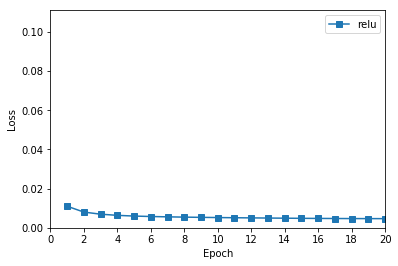

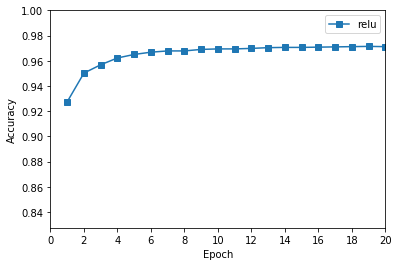

In [12]:
plot_loss_and_acc({'relu': [relu_loss, relu_acc]})

In [18]:
import numpy as np
a = np.array([[2,4,6,1],[1,5,2,9]])
print(a)
np.argmax(a,axis=1)

[[2 4 6 1]
 [1 5 2 9]]


array([2, 3])